<a href="https://colab.research.google.com/github/lelemaia/Visualiza-oDadosGraficos/blob/main/Visualiza%C3%A7%C3%A3oDadosGraficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Visualização de Dados**

Nesta aula iremos aprender a plotar gráficos utilizando bibliotecas Python.

Além de olhar na documentação das bibliotecas como fazer aquilo que queremos precisamos treinar nossa capacidade analítica para entender gráficos e saber propor as melhores visualizações.







In [ ]:
import numpy as np               # Para trabalhar com números, vetores, matrizes e funções matemáticas
import matplotlib.pyplot as plt  # Para trabalhar com gráficos
import seaborn as sns            # Para importar os graficos

In [ ]:
# Essa parte pode não mostrar
# Definindo uma função linear arbitraria (perceba que a=4 e b=5)
def func_linear(x): return(4*x-5)

x = np.array([i for i in range(-50,50)]) 

## Adidionando um ruído branco nos dados
mean_noise = 0
sigma_x = 25
y = func_linear(x) + np.random.normal(mean_noise,sigma_x, len(x))


# Definindo uma função linear arbitraria (perceba que a=4 e b=5)
def func_quadratica(x): return(0.5*x**2-5*x+50)

## Adidionando um ruído branco nos dados
mean_noise = 0
sigma_x = 225
z = func_quadratica(x) + np.random.normal(mean_noise,sigma_x, len(x))


linhas = [str(int(x[i]))+';'+str(int(y[i]))+';'+str(int(z[i]))+'\n' for i in range(0, len(x))]
    
    
with open('dados1.txt', 'w') as file:
    file.writelines(linhas)

# Carregando dados de um arquivo txt:




In [ ]:
# Carregando o arquivo
with open('dados1.txt', 'r') as file:
    dados = file.readlines()

In [ ]:
dados

In [ ]:
# Passando os dados para vetores
X = []
Y = []
Z = []

for linha in dados:
    X.append(float(linha.split(';')[0]))
    Y.append(float(linha.split(';')[1]))
    Z.append(float(linha.split(';')[2].replace('\n','')))

In [ ]:
# Transformando em vetores do numpy

x = np.array(X)
y = np.array(Y)
z = np.array(Z)

# Distribuição

A distribuição é um gráfico de barras, bidimensional (2D), de **uma única variável**, onde o eixo X é a variável  (atributo) que se está estudando e o eixo Y é a quantidade de vezes que um determinado valor do atributo aparece nos dados.

Ela é útil para nos dizer como os valores do nosso atributo estão distribuídos, se de maneira concetranda em torno de uma média ou de maneira uniforme por toda a faixa de valores. Inclusive nos permite saber se temos mais de uma média nos dados, indicando que é possível fazer uma separação dos dados.

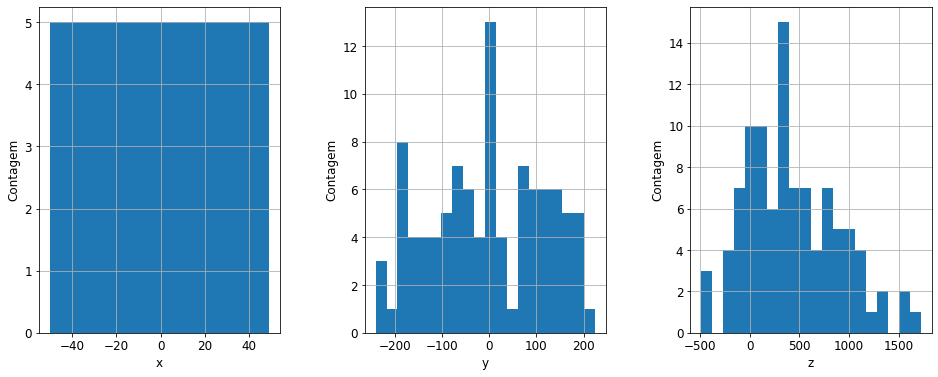

In [ ]:
n_bins = 20

# Estamos criando uma figura e os eixos associados a ela
# O subplot permite fazer mais de uma gráfico junto, neste caso 2
# Cada subplot fica atribuído um eixo no vetor axs.
# Basta acessar o vetor axs para chamar algum método
fig, axs = plt.subplots(1, 3)

fig.set_size_inches(16, 6)

axs[0].hist(x, bins=n_bins) # Aqui estamos chamando o método .hist para plotar um histograma
axs[1].hist(y, bins=n_bins)
axs[2].hist(z, bins=n_bins)

# Aqui estamos explicitamente dando nome aos eixos do gráfico
axs[0].set_xlabel('x')
axs[1].set_xlabel('y')
axs[2].set_xlabel('z')
axs[0].set_ylabel('Contagem')
axs[1].set_ylabel('Contagem')
axs[2].set_ylabel('Contagem')

# Colocando grid
axs[0].grid()
axs[1].grid()
axs[2].grid()

# Vamos aumentar a separação entre os gráficos
plt.subplots_adjust(wspace = 0.35)

# OBS: histogramas são curvas de distribuição discretas

# Vejamos como fazer o mesmo gráfico usando o Seaborn.

In [ ]:
import seaborn as sns

In [ ]:
ax = sns.displot(data=x,
                 kde=True,
                 facet_kws = dict(margin_titles=True,despine=False),
                 bins=n_bins, 
                 linewidth=0.7,
                )

ax.set(xlabel='x', ylabel='Contagem', title='Distribuição')

In [ ]:
ax = sns.displot(data=y,
                 #hist=True,
                 kde=True,
                 facet_kws = dict(margin_titles=True,despine=False),
                 bins=n_bins, 
                 linewidth=0.7,
                )

ax.set(xlabel='y', ylabel='Contagem', title='Distribuição')

In [ ]:
ax = sns.displot(data=z,
                 #hist=True,
                 kde=True,
                 facet_kws = dict(margin_titles=True,despine=False),
                 bins=n_bins, 
                 linewidth=0.7,
                )

ax.set(xlabel='z', ylabel='Contagem', title='Distribuição')

In [ ]:
sns.displot(data={'x':x,'y':y, 'z':z},
            kde=True,
            facet_kws = dict(margin_titles=True,despine=False),
            linewidth=0.7
           )

ax.set(xlabel='valor da variável', ylabel='Contagem', title='Distribuição')

# Densidade Acumulada (ou Distribuição Acumulada)


A densidade acumulada é uma forma de ver a distribuição dos dados no qual o eixo x está ordenado. No eixo y de vez de colocarmos as contagens, colocamos a proporção das contagem sendo que o total é 1 (100%).

In [ ]:
ax = sns.displot(data={'x':x,'y':y, 'z':z},
            kind="ecdf",
            facet_kws = dict(margin_titles=True,despine=False),
            linewidth=2)

ax.set(xlabel='valor da variável', ylabel='Proporção do Total', title='Densidade Acumulada')

# Dispersão

Dispersão é um gráfico onde temos duas variáveis (atributos). Queremos saber se existe alguma relação entre elas, isto é, se um depende da outra de alguma maneira, formando algum tipo de curva matemática que possamos descobrir ou utilizar para fazer predições.

In [ ]:
fig, ax = plt.subplots(1,2)

# Tamanho do gráfico
fig.set_size_inches(16, 6)

# Plot de dispersão (scatter)
ax[0].scatter(x, y, c='blue', alpha=0.5)
ax[1].scatter(x, z, c='green', alpha=0.5)

# Aqui estamos explicitamente dando nome aos eixos do gráfico
ax[0].set_xlabel('x')
ax[1].set_xlabel('x')
ax[0].set_ylabel('y')
ax[1].set_ylabel('z')

# Colocando grid
ax[0].grid()
ax[1].grid()

# Arrumando os limites dos gráficos
ax[0].set_xlim([-75,75])
ax[0].set_ylim([-250,250])
ax[1].set_xlim([-75,75])
ax[1].set_ylim([-600,2000])

# Vamos aumentar a separação entre os gráficos
plt.subplots_adjust(wspace = 0.25)

# Aumentando o tamanho da fonte (letra)
plt.rcParams.update({'font.size': 12})

In [ ]:
# Fazendo ambos no mesmo plot

plt.scatter(x, y, c='blue', alpha=0.5)
plt.scatter(x, z, c='red', alpha=0.5)
plt.xlabel('x')
plt.ylabel('valor')
plt.legend(['y','z'])
plt.xlim([-75,75])
plt.ylim([-600,2000])
plt.grid()

In [ ]:
# Fazendo ambos no mesmo plot

plt.scatter(y, z, c='green', alpha=0.5)
plt.xlabel('y')
plt.ylabel('z')
plt.xlim([-250,250])
plt.ylim([-600,2000])
plt.grid()

In [ ]:
dados.plot.scatter(x='sepal length (cm)',
                   y='sepal width (cm)'
                  )

AttributeError: ignored

# Dispersão e Distribuição

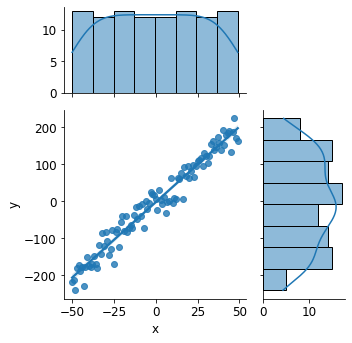

In [ ]:
sns.jointplot(data={'x':x,'y':y, 'z':z},
              x="x",
              y="y",
              height=5, 
              ratio=2,
              marginal_ticks=True,
              kind="reg"
             )

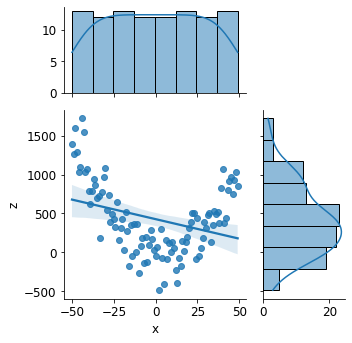

In [ ]:
sns.jointplot(data={'x':x,'y':y, 'z':z},
              x="x",
              y="z",
              height=5, 
              ratio=2,
              marginal_ticks=True,
              kind="reg"
             )


---

# **EXERCICIOS**

Dados :

In [ ]:
idades = [20,12,15,30,15,13,14,12,10,12,14,19,5]
alturas = [1.80,1.59,1.65,1.69,1.72,1.45,2,1.70,1.67,1.78,1.90,1.85,1.54]
sexo = ['M','F','M','F','M','F','M','F','M','F','M','F','M']

In [ ]:
len(idades), len(alturas), len(sexo)

# Estatística

In [ ]:
import numpy as np

In [ ]:
np.mean(idades)

In [ ]:
np.mean(alturas)

In [ ]:
sexo.count('M'), sexo.count("F")

In [ ]:
np.std(idades)

In [ ]:
np.std(alturas)

# Graficos De Distribuição

In [ ]:
import seaborn as sns

*Grafico de Distribuição idade:*

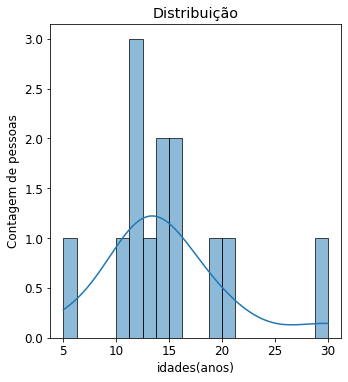

In [ ]:
ax = sns.displot(x=idades,
                 #hist=True,
                 kde=True,
                 facet_kws = dict(margin_titles=True,despine=False),
                 bins=n_bins, 
                 linewidth=0.7,
                )

ax.set(xlabel='idades(anos)', ylabel='Contagem de pessoas', title='Distribuição')

*Grafico de Distribuição altura:*

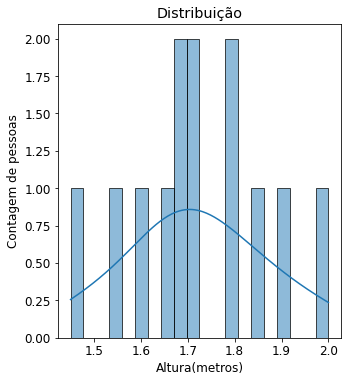

In [ ]:
ax = sns.displot(x=alturas,
                 #hist=True,
                 kde=True,
                 facet_kws = dict(margin_titles=True,despine=False),
                 bins=n_bins, 
                 linewidth=0.7,
                )

ax.set(xlabel='Altura(metros)', ylabel='Contagem de pessoas', title='Distribuição')

## 2.2 - Densidade Acumulada (ou Distribuição Acumulada)

*Grafico de Densidade / Distribuição Acumulada idade:*

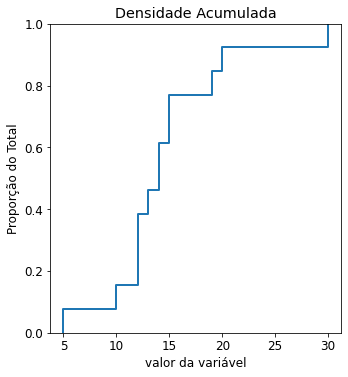

In [ ]:
ax = sns.displot(x= idades,
            kind="ecdf",
            facet_kws = dict(margin_titles=True,despine=False),
            linewidth=2)

ax.set(xlabel='valor da variável', ylabel='Proporção do Total', title='Densidade Acumulada')

*Grafico de Densidade / Distribuição Acumulada altura:*

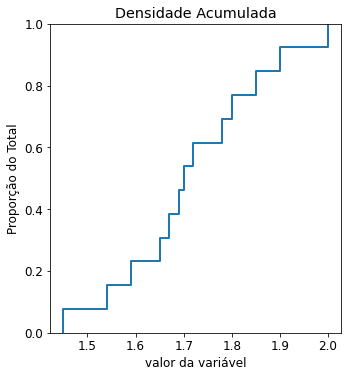

In [ ]:
ax = sns.displot(x= alturas,
            kind="ecdf",
            facet_kws = dict(margin_titles=True,despine=False),
            linewidth=2)

ax.set(xlabel='valor da variável', ylabel='Proporção do Total', title='Densidade Acumulada')

## 2.3 - Dispersão
*Grafico de Disperção :*

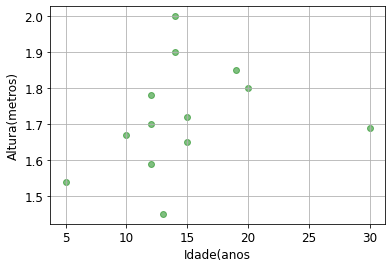

In [ ]:
plt.scatter(idades, alturas, c='green', alpha=0.5)
plt.xlabel('Idade(anos')
plt.ylabel('Altura(metros)')
plt.grid()

## 2.4 - Dispersão e Distribuição

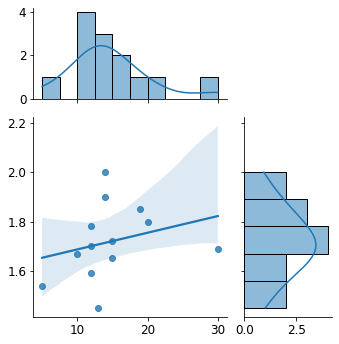

In [ ]:
sns.jointplot(x = idades,
              y = alturas,
              height=5, 
              ratio=2,
              marginal_ticks=True,
              kind="reg"
             )

-----------------------------